In [1]:
import os
import pandas as pd

CHEMIN_DOSSIER_DONNÉES = "../../../data_test/diamant"
DATE_FICHIER = '2022_09_01'
encoding = 'utf-8'

In [7]:
ann_ms_tdp_et = pd.read_csv(os.path.join(CHEMIN_DOSSIER_DONNÉES, f'ANN_MS_TDP_ET_{DATE_FICHIER}.CSV'), delimiter=";", encoding=encoding, dtype='str')

In [10]:
colonnes = [
    "Nombre de CDD de remplacement",
    "Taux de prestations externes sur les prestations directes",
    "Taux d'ETP vacants au 31/12",
    "Taux de rotation du personnel sur effectifs réels",
    "Taux d'absentéisme (hors formation)",
    "Taux d'absentéisme pour maladie ordinaire/courte durée",
    "Taux d'absentéisme pour maladie moyenne durée",
    "Taux d'absentéisme pour maladie longue durée",
    "Taux d'absentéisme pour maternité/paternité",
    "Taux d'absentéisme pour accident du travail / maladie professionnelle",
    "Taux d'absentéisme pour congés spéciaux dont sans solde"
]
index = [
    "Finess",
    "Année"
]

## Doublons

In [16]:
a_plus_d_une_donnée_par_finess_par_année = (ann_ms_tdp_et.groupby(index).nunique() > 1).any(axis=1)

## Valeurs manquantes

In [35]:
ann_ms_tdp_et[colonnes].count() / 

Nombre de CDD de remplacement                                            30388
Taux de prestations externes sur les prestations directes                29708
Taux d'ETP vacants au 31/12                                              27398
Taux de rotation du personnel sur effectifs réels                        30559
Taux d'absentéisme (hors formation)                                      30992
Taux d'absentéisme pour maladie ordinaire/courte durée                   28985
Taux d'absentéisme pour maladie moyenne durée                            28985
Taux d'absentéisme pour maladie longue durée                             28986
Taux d'absentéisme pour maternité/paternité                              28985
Taux d'absentéisme pour accident du travail / maladie professionnelle    28985
Taux d'absentéisme pour congés spéciaux dont sans solde                  28985
dtype: int64

In [74]:
(~ann_ms_tdp_et[[
    "Taux d'absentéisme (hors formation)",
    "Taux d'absentéisme pour maladie ordinaire/courte durée",
    "Taux d'absentéisme pour maladie moyenne durée",
    "Taux d'absentéisme pour maladie longue durée",
    "Taux d'absentéisme pour maternité/paternité",
    "Taux d'absentéisme pour accident du travail / maladie professionnelle",
    "Taux d'absentéisme pour congés spéciaux dont sans solde"
]].isna().apply(any, axis=1)).sum()

28985

In [37]:
ann_ms_tdp_et[colonnes].isna().sum() / ann_ms_tdp_et.shape[0]

Nombre de CDD de remplacement                                            0.082017
Taux de prestations externes sur les prestations directes                0.102559
Taux d'ETP vacants au 31/12                                              0.172341
Taux de rotation du personnel sur effectifs réels                        0.076851
Taux d'absentéisme (hors formation)                                      0.063771
Taux d'absentéisme pour maladie ordinaire/courte durée                   0.124400
Taux d'absentéisme pour maladie moyenne durée                            0.124400
Taux d'absentéisme pour maladie longue durée                             0.124369
Taux d'absentéisme pour maternité/paternité                              0.124400
Taux d'absentéisme pour accident du travail / maladie professionnelle    0.124400
Taux d'absentéisme pour congés spéciaux dont sans solde                  0.124400
dtype: float64

## Années renseignées

In [46]:
ann_ms_tdp_et['Année'].unique()

array(['2019', '2018'], dtype=object)

<AxesSubplot: >

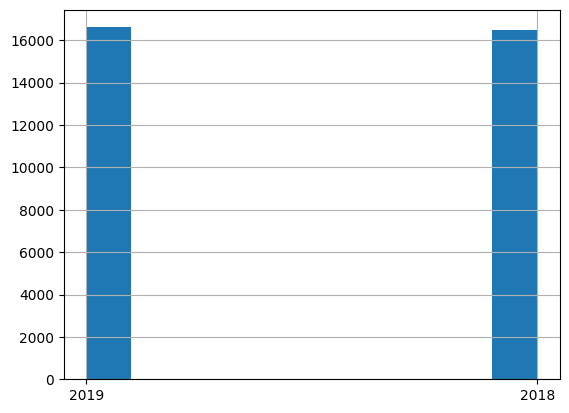

In [45]:
ann_ms_tdp_et['Année'].hist()

<AxesSubplot: >

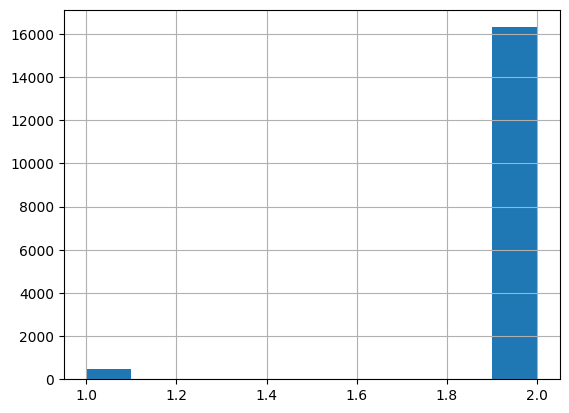

In [38]:
ann_ms_tdp_et.groupby('Finess').count()['Année'].hist()

## Cohérence des données

### Présence de taux négatifs

In [67]:
for colonne in colonnes:
    print(colonne, " ===> ", ann_ms_tdp_et[ann_ms_tdp_et[colonne].astype(float) < 0].shape[0])

Nombre de CDD de remplacement  ===>  0
Taux de prestations externes sur les prestations directes  ===>  0
Taux d'ETP vacants au 31/12  ===>  11
Taux de rotation du personnel sur effectifs réels  ===>  0
Taux d'absentéisme (hors formation)  ===>  0
Taux d'absentéisme pour maladie ordinaire/courte durée  ===>  0
Taux d'absentéisme pour maladie moyenne durée  ===>  0
Taux d'absentéisme pour maladie longue durée  ===>  0
Taux d'absentéisme pour maternité/paternité  ===>  0
Taux d'absentéisme pour accident du travail / maladie professionnelle  ===>  0
Taux d'absentéisme pour congés spéciaux dont sans solde  ===>  0


In [77]:
ann_ms_tdp_et[ann_ms_tdp_et["Taux d'ETP vacants au 31/12"].astype(float) < 0][colonnes]

,Nombre de CDD de remplacement,Taux de prestations externes sur les prestations directes,Taux d'ETP vacants au 31/12,Taux de rotation du personnel sur effectifs réels,Taux d'absentéisme (hors formation),Taux d'absentéisme pour maladie ordinaire/courte durée,Taux d'absentéisme pour maladie moyenne durée,Taux d'absentéisme pour maladie longue durée,Taux d'absentéisme pour maternité/paternité,Taux d'absentéisme pour accident du travail / maladie professionnelle,Taux d'absentéisme pour congés spéciaux dont sans solde
12838,43,.050000000000000000000000000,-.004500000000000000000000000,.098600000000000000000000000,.048900000000000000000000000,.007100000000000000000000000,.020200000000000000000000000,.000000000000000000000000000,.006400000000000000000000000,.013900000000000000000000000,.001300000000000000000000000
12865,1,.194200000000000000000000000,-.006000000000000000000000000,1.222200000000000000000000000,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
12866,NaN,.178700000000000000000000000,-.065800000000000000000000000,NaN,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
12947,1,.187700000000000000000000000,-.014500000000000000000000000,1.428600000000000000000000000,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
12958,NaN,.285600000000000000000000000,-.009100000000000000000000000,NaN,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
12986,NaN,.202500000000000000000000000,-.020500000000000000000000000,NaN,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
13008,NaN,.271600000000000000000000000,-.023300000000000000000000000,NaN,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
14530,49,.004900000000000000000000000,-.012300000000000000000000000,.000000000000000000000000000,.010000000000000000000000000,.001700000000000000000000000,.000000000000000000000000000,.000000000000000000000000000,.000000000000000000000000000,.000000000000000000000000000,.008300000000000000000000000
14532,246,.001800000000000000000000000,-.069000000000000000000000000,.086200000000000000000000000,.174500000000000000000000000,.002900000000000000000000000,.034500000000000000000000000,.036400000000000000000000000,.021000000000000000000000000,.072600000000000000000000000,.007200000000000000000000000
19531,284,.003100000000000000000000000,-3.065300000000000000000000000,.259600000000000000000000000,.104500000000000000000000000,.009400000000000000000000000,.047100000000000000000000000,.000000000000000000000000000,.031400000000000000000000000,.002200000000000000000000000,.014400000000000000000000000


###  Présence de taux > 100 %

In [68]:
for colonne in colonnes:
    print(colonne, " ===> ", ann_ms_tdp_et[ann_ms_tdp_et[colonne].astype(float) > 1].shape[0])

Nombre de CDD de remplacement  ===>  24037
Taux de prestations externes sur les prestations directes  ===>  0
Taux d'ETP vacants au 31/12  ===>  0
Taux de rotation du personnel sur effectifs réels  ===>  75
Taux d'absentéisme (hors formation)  ===>  0
Taux d'absentéisme pour maladie ordinaire/courte durée  ===>  0
Taux d'absentéisme pour maladie moyenne durée  ===>  0
Taux d'absentéisme pour maladie longue durée  ===>  0
Taux d'absentéisme pour maternité/paternité  ===>  0
Taux d'absentéisme pour accident du travail / maladie professionnelle  ===>  0
Taux d'absentéisme pour congés spéciaux dont sans solde  ===>  0


In [78]:
ann_ms_tdp_et[ann_ms_tdp_et["Taux de rotation du personnel sur effectifs réels"].astype(float) > 1][colonnes]

,Nombre de CDD de remplacement,Taux de prestations externes sur les prestations directes,Taux d'ETP vacants au 31/12,Taux de rotation du personnel sur effectifs réels,Taux d'absentéisme (hors formation),Taux d'absentéisme pour maladie ordinaire/courte durée,Taux d'absentéisme pour maladie moyenne durée,Taux d'absentéisme pour maladie longue durée,Taux d'absentéisme pour maternité/paternité,Taux d'absentéisme pour accident du travail / maladie professionnelle,Taux d'absentéisme pour congés spéciaux dont sans solde
20,45,.065900000000000000000000000,.065200000000000000000000000,1.125000000000000000000000000,.076700000000000000000000000,.000300000000000000000000000,.005700000000000000000000000,.038100000000000000000000000,.006400000000000000000000000,.004200000000000000000000000,.022000000000000000000000000
887,26,.005300000000000000000000000,.005500000000000000000000000,14.500000000000000000000000000,.151800000000000000000000000,.031000000000000000000000000,.000000000000000000000000000,.041300000000000000000000000,.015000000000000000000000000,.056000000000000000000000000,.008500000000000000000000000
888,26,.000000000000000000000000000,.020200000000000000000000000,15.228800000000000000000000000,.111800000000000000000000000,.003000000000000000000000000,.003200000000000000000000000,.058700000000000000000000000,.027300000000000000000000000,.019600000000000000000000000,.000000000000000000000000000
1292,227,.145900000000000000000000000,1.000000000000000000000000000,1.073500000000000000000000000,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN
1420,87,.069000000000000000000000000,NaN,1.090400000000000000000000000,.137000000000000000000000000,.071200000000000000000000000,.015000000000000000000000000,.034900000000000000000000000,.004700000000000000000000000,.010200000000000000000000000,.000900000000000000000000000
...,...,...,...,...,...,...,...,...,...,...,...
31898,435,.007800000000000000000000000,.002600000000000000000000000,1.138500000000000000000000000,.192400000000000000000000000,.010200000000000000000000000,.055600000000000000000000000,.016700000000000000000000000,.033400000000000000000000000,.035700000000000000000000000,.040900000000000000000000000
32154,14,.069400000000000000000000000,.000000000000000000000000000,2.833300000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32511,NaN,.053900000000000000000000000,NaN,2.066700000000000000000000000,.210000000000000000000000000,.008800000000000000000000000,.015200000000000000000000000,.172500000000000000000000000,.000000000000000000000000000,.007500000000000000000000000,.006000000000000000000000000
32512,NaN,.002000000000000000000000000,.000000000000000000000000000,1.327300000000000000000000000,.000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN


## Cohérence des taux d'absentéisme

In [112]:
comparaison_des_sommes = ann_ms_tdp_et[["Taux d'absentéisme (hors formation)"]].astype(float).round(decimals=2)

In [117]:
comparaison_des_sommes['somme_des_taux'] = ann_ms_tdp_et[[
    "Taux d'absentéisme pour maladie ordinaire/courte durée",
    "Taux d'absentéisme pour maladie moyenne durée",
    "Taux d'absentéisme pour maladie longue durée",
    "Taux d'absentéisme pour maternité/paternité",
    "Taux d'absentéisme pour accident du travail / maladie professionnelle",
    "Taux d'absentéisme pour congés spéciaux dont sans solde"
]].astype(float).sum(axis=1, skipna=False).round(decimals=2)

In [119]:
somme_des_taux_absentéisme_incohérent = comparaison_des_sommes["Taux d'absentéisme (hors formation)"] != comparaison_des_sommes["somme_des_taux"]

In [120]:
comparaison_des_sommes[somme_des_taux_absentéisme_incohérent]

,Taux d'absentéisme (hors formation),somme_des_taux
3,0.00,NaN
17,0.00,NaN
41,0.00,NaN
74,0.00,NaN
80,NaN,NaN
...,...,...
32946,NaN,NaN
33025,NaN,NaN
33045,NaN,NaN
33048,NaN,NaN


### 0 pour Taux d'absentéisme (hors formation) & NaN pour la somme des autres taux

In [130]:
taux_d_absentéisme_à_0_et_somme_à_nan = (comparaison_des_sommes["Taux d'absentéisme (hors formation)"] == 0) & (comparaison_des_sommes["somme_des_taux"].isna())

In [131]:
comparaison_des_sommes[taux_d_absentéisme_à_0_et_somme_à_nan].shape[0] / ann_ms_tdp_et.shape[0]

0.06062894601697731

Quand les taux d'absentéismes ne sont pas remplis (NAN) leur somme (Taux d'absentéisme (hors formation)) est à 0 => est-ce que c'est DIAMANT qui le calcule ? 

### NaN pour Taux d'absentéisme (hors formation) & NaN pour la somme des autres taux

In [132]:
taux_d_absentéisme_à_nan_et_somme_à_nan = (comparaison_des_sommes["Taux d'absentéisme (hors formation)"].isna())

In [133]:
comparaison_des_sommes[taux_d_absentéisme_à_nan_et_somme_à_nan].shape[0] / ann_ms_tdp_et.shape[0]

0.06377065522762287

In [135]:
comparaison_des_sommes[(~(taux_d_absentéisme_à_0_et_somme_à_nan | taux_d_absentéisme_à_nan_et_somme_à_nan)) & somme_des_taux_absentéisme_incohérent]

,Taux d'absentéisme (hors formation),somme_des_taux
373,0.07,0.08
596,0.14,0.15
1000,0.11,0.10
1145,0.17,0.16
1345,0.35,0.34
...,...,...
32205,0.07,0.08
32659,0.00,0.01
32764,0.05,0.04
32908,0.10,0.11


Parfois, la somme des taux n'est pas parfaitement égales au taux d'absentéisme hors formations => erreur d'arrondi par DIAMANT ? Peut-on nous même faire la somme ?

In [147]:
comparaison_des_sommes.apply(lambda x: abs(x["Taux d'absentéisme (hors formation)"] - x["somme_des_taux"]) > 0.01, axis=1).sum()

68

In [154]:
ann_ms_tdp_et[colonnes].astype(float).describe()

,Nombre de CDD de remplacement,Taux de prestations externes sur les prestations directes,Taux d'ETP vacants au 31/12,Taux de rotation du personnel sur effectifs réels,Taux d'absentéisme (hors formation),Taux d'absentéisme pour maladie ordinaire/courte durée,Taux d'absentéisme pour maladie moyenne durée,Taux d'absentéisme pour maladie longue durée,Taux d'absentéisme pour maternité/paternité,Taux d'absentéisme pour accident du travail / maladie professionnelle,Taux d'absentéisme pour congés spéciaux dont sans solde
count,3.038800e+04,29708.000000,27398.000000,30559.000000,30992.000000,28985.000000,28985.000000,28986.000000,28985.000000,28985.000000,28985.000000
mean,3.291682e+05,0.050716,0.033913,0.136443,0.102427,0.015066,0.030637,0.024852,0.012949,0.015036,0.010979
std,5.736526e+07,0.083995,0.082486,0.226819,0.075909,0.024270,0.033301,0.037964,0.020240,0.022784,0.023135
min,0.000000e+00,0.000000,-3.065300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+00,0.008300,0.000000,0.048400,0.051800,0.002700,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.100000e+01,0.024100,0.002200,0.100000,0.094800,0.005900,0.025000,0.010350,0.006900,0.005900,0.001900
75%,6.200000e+01,0.059500,0.043100,0.179200,0.140400,0.014600,0.046600,0.037800,0.018200,0.021600,0.011100
max,1.000000e+10,1.000000,1.000000,15.228800,0.991200,0.490600,0.678200,0.565400,0.560100,0.418500,0.452500


array([[<AxesSubplot: title={'center': 'Nombre de CDD de remplacement'}>],
       [<AxesSubplot: title={'center': 'Taux de prestations externes sur les prestations directes'}>],
       [<AxesSubplot: title={'center': "Taux d'ETP vacants au 31/12"}>],
       [<AxesSubplot: title={'center': 'Taux de rotation du personnel sur effectifs réels'}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme (hors formation)"}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme pour maladie ordinaire/courte durée"}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme pour maladie moyenne durée"}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme pour maladie longue durée"}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme pour maternité/paternité"}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme pour accident du travail / maladie professionnelle"}>],
       [<AxesSubplot: title={'center': "Taux d'absentéisme pour congés spéciaux dont san

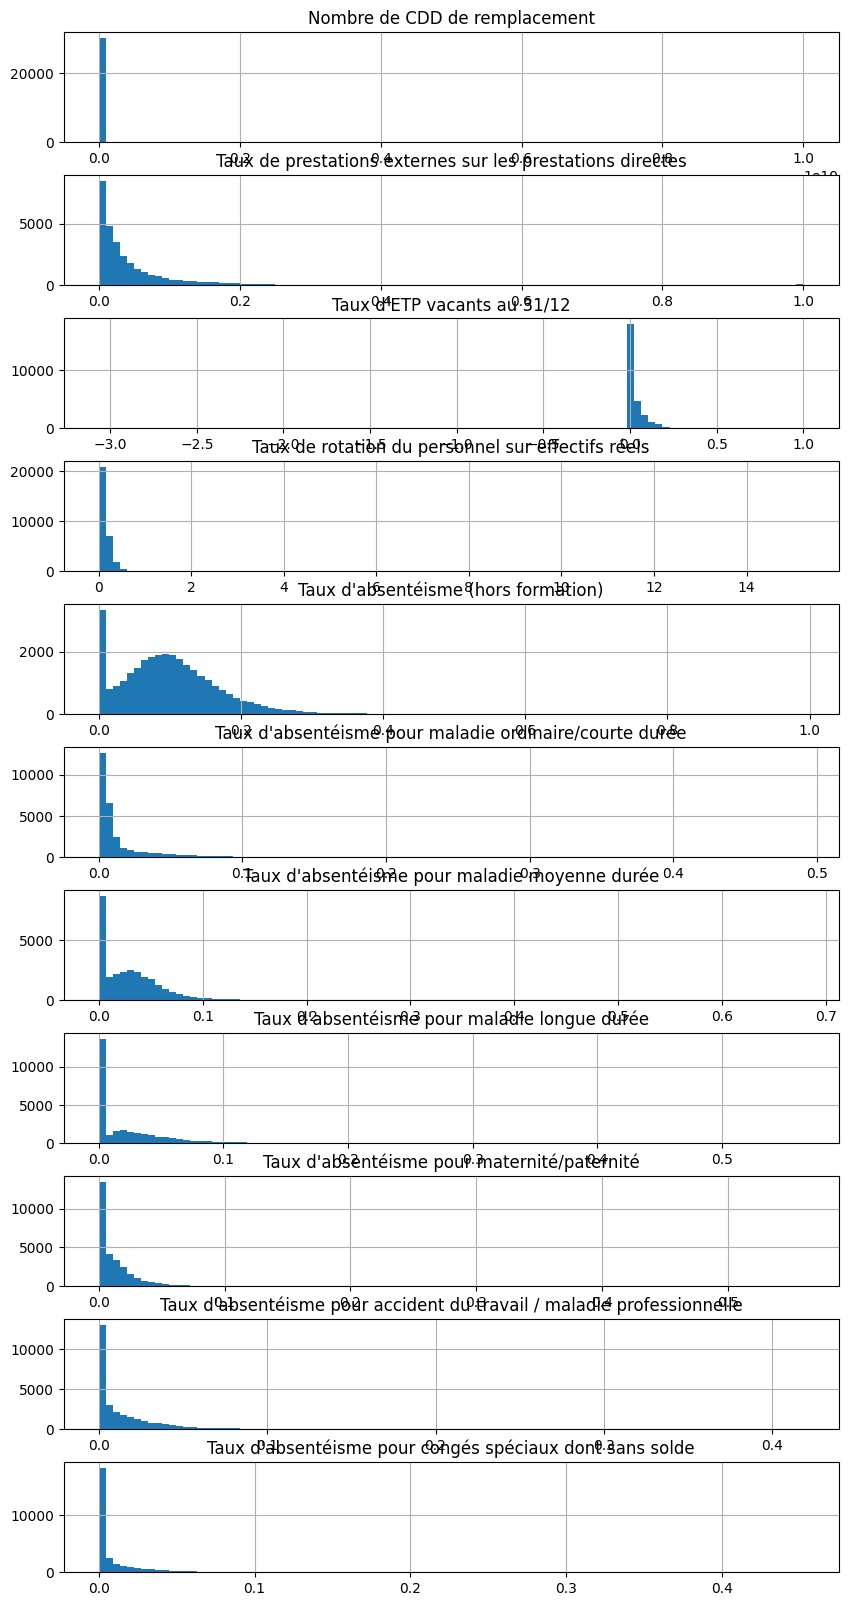

In [175]:
ann_ms_tdp_et[colonnes].astype(float).hist(bins=100, figsize=(10, 20) ,layout=(11, 1))